<a href="https://colab.research.google.com/github/m-bkarimi/Grokking-Deep-Learning/blob/master/chapter8_gdl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Three-layer network on MNIST
Let’s return to the MNIST dataset and attempt to classify it with
the new network.


In this chapter, we’re going to study the basics of regularization, which is key to combatting
overfitting in neural networks. To do this, we’ll start with the most powerful neural network
(three-layer network with relu hidden layer) on the most challenging task (MNIST digit
classification).
To begin, go ahead and train the network, as shown next. You should see the same results
as those listed. Alas, the network learned to perfectly predict the training data. Should
we celebrate?



In [ ]:
import sys, numpy as np
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

images, labels = (x_train[0:1000].reshape(1000,28*28) / 255, y_train[0:1000])

one_hot_labels = np.zeros((len(labels),10))
for i,l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1
    
np.random.seed(1)
relu = lambda x:(x>=0) * x # returns x if x > 0, return 0 otherwise
relu2deriv = lambda x: x>=0 # returns 1 for input > 0, return 0 otherwise
alpha, iterations, hidden_size, pixels_per_image, num_labels = (0.005, 350, 40, 784, 10)

weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

for j in range(iterations):
    error, correct_cnt = (0.0, 0)
    
    for i in range(len(images)):
        layer_0 = images[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)

        error += np.sum((labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == \
                                        np.argmax(labels[i:i+1]))

        layer_2_delta = (labels[i:i+1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T)\
                                    * relu2deriv(layer_1)
        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    sys.stdout.write("\r I:"+str(j)+ \
                     " Train-Err:" + str(error/float(len(images)))[0:5] +\
                     " Train-Acc:" + str(correct_cnt/float(len(images))))

11490434/11490434 [==============================] - 1s 0us/step
 I:349 Train-Err:0.108 Train-Acc:1.0

In [ ]:
if(j % 10 == 0 or j == iterations-1):
    error, correct_cnt = (0.0, 0)

    for i in range(len(test_images)):

        layer_0 = test_images[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)

        error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == \
                                        np.argmax(test_labels[i:i+1]))
    sys.stdout.write(" Test-Err:" + str(error/float(len(test_images)))[0:5] +\
                     " Test-Acc:" + str(correct_cnt/float(len(test_images))) + "\n")
    print()

 Test-Err:0.653 Test-Acc:0.7073



The network did horribly! It predicted with an accuracy of only 70.7%. Why does it do so
terribly on these new testing images when it learned to predict with 100% accuracy on the
training data? How strange.
This 70.7% number is called the test accuracy. It’s the accuracy of the neural network on
data the network was not trained on. This number is important because it simulates how
well the neural network will perform if you try to use it in the real world (which gives the
network only images it hasn’t seen before). This is the score that matters.

<font color=red>**Memorization vs. generalization**</font>

**Memorizing 1,000 images is easier than generalizing to all images.**

If we train it on 1,000 images, which it learns to predict perfectly,
why does it work on other images at all?

As you might expect, when the fully trained neural network is applied to a new image,
it’s guaranteed to work well only if the new image is nearly identical to an image from the
training data. Why? Because the neural network learned to transform input data to output
data for only very specific input configurations. If you give it something that doesn’t look
familiar, it will predict randomly.
This makes neural networks kind of pointless. What’s the point of a neural network working only
on the data you trained it on? You already know the correct classifications for those datapoints.
Neural networks are useful only if they work on data you don’t already know the answer to



<font color=red>**Overfitting in neural networks**</font>


**Neural networks can get worse if you train them too much!**

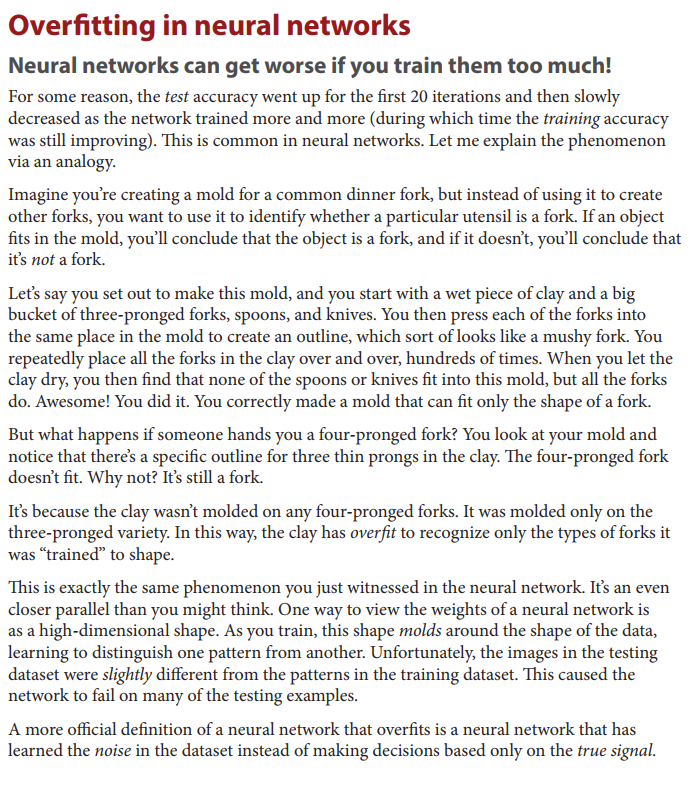
